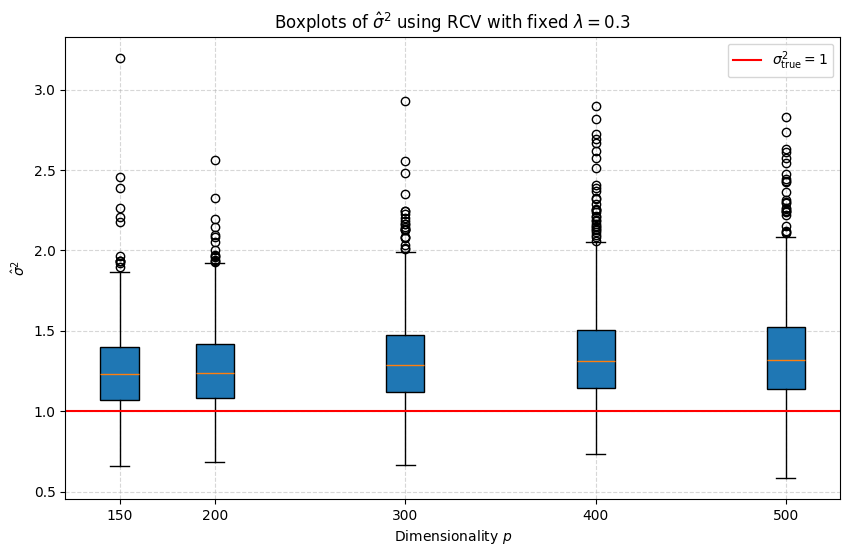

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# 参数设定
B = 25000
n = 100
p_list = [150, 200, 300, 400, 500]
s = 10
sigma2_true = 1
lambda_fixed = 0.3  # RCV 估算阶段固定 lambda

def generate_X(n, p, a=10):
    I = np.eye(p)
    E = np.ones((p, p))
    Gamma = I + a * E
    L = np.linalg.cholesky(Gamma)
    Z = np.random.randn(n, p)
    return Z @ L.T

def generate_beta(p, s=10):
    beta = np.array([1, -1, 0.5, -0.5, 0.2, -0.2, 0.1, -0.1, 0.05, -0.05] + [0]*(p - s))
    return beta

def estimate_sigma2_rcv(X, y, lam):
    n, p = X.shape
    half = n // 2
    X1, X2 = X[:half], X[half:]
    y1, y2 = y[:half], y[half:]

    model1 = Lasso(alpha=lam, fit_intercept=False, max_iter=10000).fit(X1, y1)
    idx1 = np.where(model1.coef_ != 0)[0]
    if len(idx1) == 0 or len(idx1) >= half:
        return np.nan
    X2_M1 = X2[:, idx1]
    P1 = X2_M1 @ np.linalg.pinv(X2_M1.T @ X2_M1) @ X2_M1.T
    sigma2_1 = y2.T @ (np.eye(half) - P1) @ y2 / (half - len(idx1))

    model2 = Lasso(alpha=lam, fit_intercept=False, max_iter=10000).fit(X2, y2)
    idx2 = np.where(model2.coef_ != 0)[0]
    if len(idx2) == 0 or len(idx2) >= half:
        return np.nan
    X1_M2 = X1[:, idx2]
    P2 = X1_M2 @ np.linalg.pinv(X1_M2.T @ X1_M2) @ X1_M2.T
    sigma2_2 = y1.T @ (np.eye(half) - P2) @ y1 / (half - len(idx2))

    num1, num2 = (half - len(idx1)), (half - len(idx2))
    denom = num1 + num2
    sigma2_rcv = sigma2_1 * (num1 / denom) + sigma2_2 * (num2 / denom)
    return sigma2_rcv

# 主循环
results = {}
for p in p_list:
    estimates = []
    for _ in range(B):
        X = generate_X(n, p)
        beta = generate_beta(p)
        eps = np.random.normal(0, np.sqrt(sigma2_true), size=n)
        y = X @ beta + eps
        sig2 = estimate_sigma2_rcv(X, y, lambda_fixed)
        if not np.isnan(sig2):
            estimates.append(sig2)
    results[p] = estimates

# 画图 (修改后)
plt.figure(figsize=(10,6))
plt.boxplot([results[p] for p in p_list], positions=p_list, widths=20, patch_artist=True)
plt.axhline(y=sigma2_true, color='red', linewidth=1.5, label=r'$\sigma^2_{\mathrm{true}} = 1$')
plt.xlabel("Dimensionality $p$")
plt.ylabel(r"$\hat{\sigma}^2$")
plt.title(r"Boxplots of $\hat{\sigma}^2$ using RCV with fixed $\lambda = 0.3$")
plt.xticks(p_list, [str(p) for p in p_list])  # 让横坐标清晰显示
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



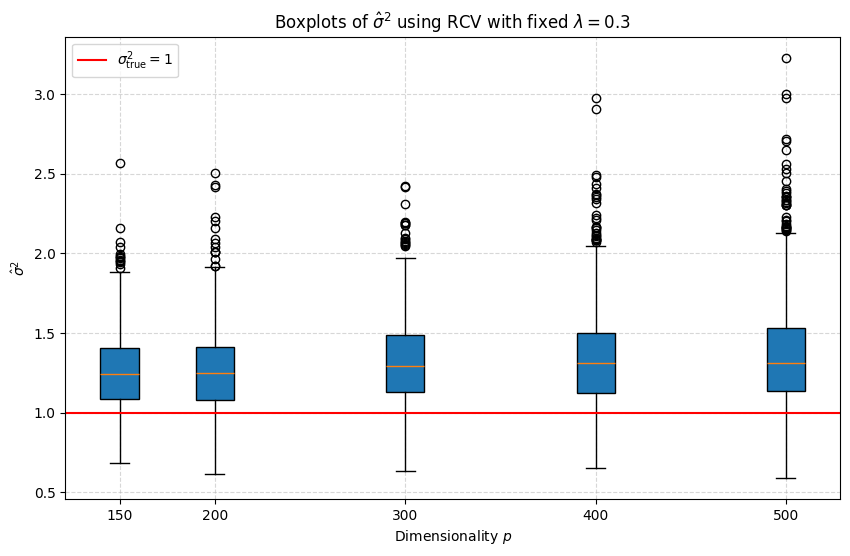

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# 参数设定
B = 25000
n = 100
p_list = [150, 200, 300, 400, 500]
s = 6
sigma2_true = 1
lambda_fixed = 0.3  # RCV 估算阶段固定 lambda

def generate_X(n, p, a=10):
    I = np.eye(p)
    E = np.ones((p, p))
    Gamma = I + a * E
    L = np.linalg.cholesky(Gamma)
    Z = np.random.randn(n, p)
    return Z @ L.T

def generate_beta(p, s=10):
    beta = np.array([1, -1, 0.5, -0.5, 0.2, -0.2, 0.1, -0.1, 0.05, -0.05] + [0]*(p - s))
    return beta

def estimate_sigma2_rcv(X, y, lam):
    n, p = X.shape
    half = n // 2
    X1, X2 = X[:half], X[half:]
    y1, y2 = y[:half], y[half:]

    model1 = Lasso(alpha=lam, fit_intercept=False, max_iter=10000).fit(X1, y1)
    idx1 = np.where(model1.coef_ != 0)[0]
    if len(idx1) == 0 or len(idx1) >= half:
        return np.nan
    X2_M1 = X2[:, idx1]
    P1 = X2_M1 @ np.linalg.pinv(X2_M1.T @ X2_M1) @ X2_M1.T
    sigma2_1 = y2.T @ (np.eye(half) - P1) @ y2 / (half - len(idx1))

    model2 = Lasso(alpha=lam, fit_intercept=False, max_iter=10000).fit(X2, y2)
    idx2 = np.where(model2.coef_ != 0)[0]
    if len(idx2) == 0 or len(idx2) >= half:
        return np.nan
    X1_M2 = X1[:, idx2]
    P2 = X1_M2 @ np.linalg.pinv(X1_M2.T @ X1_M2) @ X1_M2.T
    sigma2_2 = y1.T @ (np.eye(half) - P2) @ y1 / (half - len(idx2))

    num1, num2 = (half - len(idx1)), (half - len(idx2))
    denom = num1 + num2
    sigma2_rcv = sigma2_1 * (num1 / denom) + sigma2_2 * (num2 / denom)
    return sigma2_rcv

# 主循环
results = {}
for p in p_list:
    estimates = []
    for _ in range(B):
        X = generate_X(n, p)
        beta = generate_beta(p)
        eps = np.random.normal(0, np.sqrt(sigma2_true), size=n)
        y = X @ beta + eps
        sig2 = estimate_sigma2_rcv(X, y, lambda_fixed)
        if not np.isnan(sig2):
            estimates.append(sig2)
    results[p] = estimates

# 画图 (修改后)
plt.figure(figsize=(10,6))
plt.boxplot([results[p] for p in p_list], positions=p_list, widths=20, patch_artist=True)
plt.axhline(y=sigma2_true, color='red', linewidth=1.5, label=r'$\sigma^2_{\mathrm{true}} = 1$')
plt.xlabel("Dimensionality $p$")
plt.ylabel(r"$\hat{\sigma}^2$")
plt.title(r"Boxplots of $\hat{\sigma}^2$ using RCV with fixed $\lambda = 0.3$")
plt.xticks(p_list, [str(p) for p in p_list])  # 让横坐标清晰显示
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<ipython-input-6-bd7dab61f298>:83: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = axes[idx].boxplot(data_est, positions=positions_est, widths=0.6, patch_artist=True, boxprops=dict(facecolor='green'), labels=beta_values)
<ipython-input-6-bd7dab61f298>:84: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot2 = axes[idx].boxplot(data_true, positions=positions_true, widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'), labels=beta_values)
<ipython-input-6-bd7dab61f298>:83: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = axes[idx].boxplot(data_est, positions=positions_est, widths=0.6, patch_ar

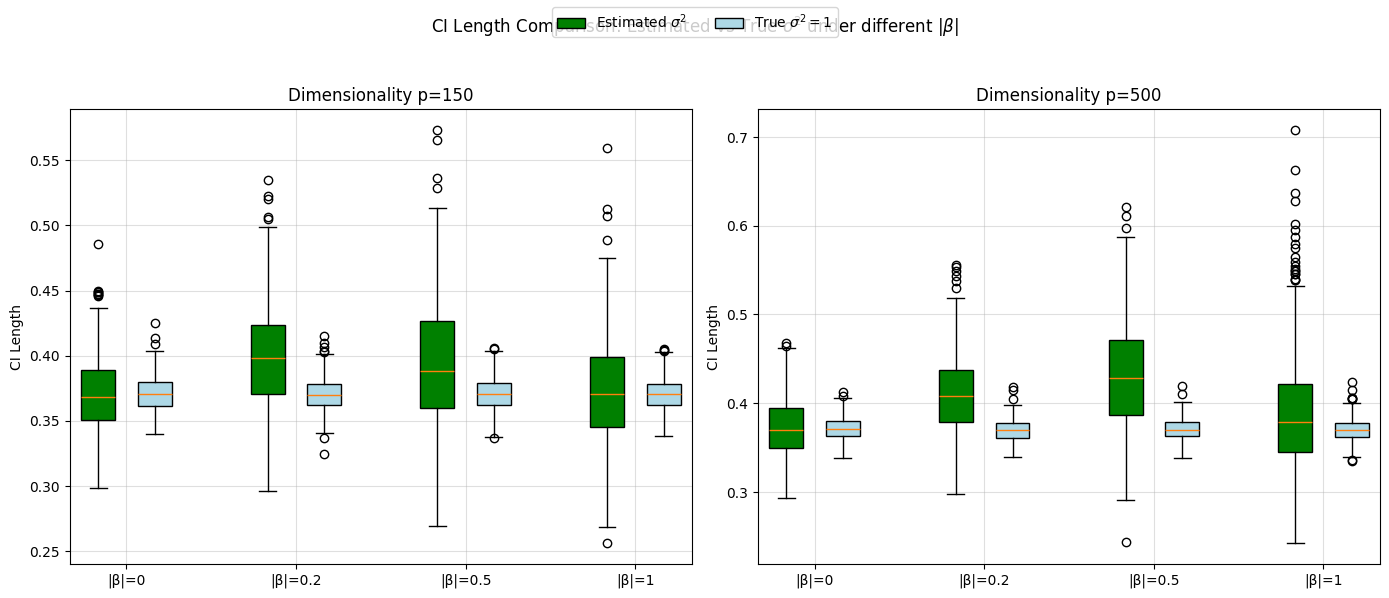

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# 参数设定
B = 25000
n = 100
p_list = [150, 500]
s = 6
sigma2_true = 1
lambda_fixed = 0.3
beta_values = [0, 0.2, 0.5, 1]
gamma = 1

def generate_X(n, p, a=10):
    Gamma = np.eye(p) + a * np.ones((p, p))
    L = np.linalg.cholesky(Gamma)
    return np.random.randn(n, p) @ L.T

def generate_beta(p, val, s=6):
    return np.array([val]*s + [0]*(p - s))

def estimate_sigma2_rcv(X, y, lam):
    n, p = X.shape
    half = n // 2
    X1, X2 = X[:half], X[half:]
    y1, y2 = y[:half], y[half:]

    model1 = Lasso(alpha=lam, fit_intercept=False, max_iter=50000).fit(X1, y1)
    idx1 = np.where(model1.coef_ != 0)[0]
    if len(idx1) == 0 or len(idx1) >= half:
        return np.nan
    model2 = Lasso(alpha=lam, fit_intercept=False, max_iter=50000).fit(X2, y2)
    idx2 = np.where(model2.coef_ != 0)[0]
    if len(idx2) == 0 or len(idx2) >= half:
        return np.nan

    X2_M1, X1_M2 = X2[:, idx1], X1[:, idx2]
    P1 = X2_M1 @ np.linalg.pinv(X2_M1.T @ X2_M1) @ X2_M1.T
    P2 = X1_M2 @ np.linalg.pinv(X1_M2.T @ X1_M2) @ X1_M2.T

    sigma2_1 = y2.T @ (np.eye(half) - P1) @ y2 / (half - len(idx1))
    sigma2_2 = y1.T @ (np.eye(half) - P2) @ y1 / (half - len(idx2))

    return (sigma2_1 + sigma2_2) / 2

def interval_length(X, sigma2):
    XT_X_inv = np.linalg.pinv(X.T @ X)
    se = np.sqrt(np.diag(XT_X_inv) * sigma2)
    return 2 * 1.96 * se

results = {}

for p in p_list:
    for beta_val in beta_values:
        est_lengths, true_lengths = [], []
        for _ in range(B):
            X = generate_X(n, p)
            beta = generate_beta(p, beta_val)
            y = X @ beta + np.random.normal(0, np.sqrt(sigma2_true), size=n)

            # estimated sigma^2
            est_sigma2 = estimate_sigma2_rcv(X, y, lambda_fixed)
            if not np.isnan(est_sigma2):
                length_est = np.mean(interval_length(X[:, :s], est_sigma2))
                est_lengths.append(length_est)

            # true sigma^2
            length_true = np.mean(interval_length(X[:, :s], sigma2_true))
            true_lengths.append(length_true)

        results[(p, beta_val)] = {'estimated': est_lengths, 'true': true_lengths}

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for idx, p in enumerate(p_list):
    data_est = [results[(p, val)]['estimated'] for val in beta_values]
    data_true = [results[(p, val)]['true'] for val in beta_values]

    positions_est = np.arange(len(beta_values))*3.0
    positions_true = positions_est + 1

    bplot1 = axes[idx].boxplot(data_est, positions=positions_est, widths=0.6, patch_artist=True, boxprops=dict(facecolor='green'), labels=beta_values)
    bplot2 = axes[idx].boxplot(data_true, positions=positions_true, widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'), labels=beta_values)

    axes[idx].set_xticks((positions_est + positions_true) / 2)
    axes[idx].set_xticklabels([f"|β|={val}" for val in beta_values])
    axes[idx].set_title(f"Dimensionality p={p}")
    axes[idx].set_ylabel("CI Length")
    axes[idx].grid(alpha=0.4)

fig.legend([bplot1["boxes"][0], bplot2["boxes"][0]], ['Estimated $\sigma^2$', 'True $\sigma^2=1$'], loc='upper center', ncol=2)
fig.suptitle("CI Length Comparison: Estimated vs True $\sigma^2$ under different $|β|$")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso

# 参数设定
B = 25000
n = 100
p_list = [150, 200, 300, 400, 500]
s = 6
sigma2_true = 1
lambda_fixed = 0.3
beta_values = [0, 0.2, 0.5, 1]

def generate_X(n, p, a=10):
    Gamma = np.eye(p) + a * np.ones((p, p))
    L = np.linalg.cholesky(Gamma)
    return np.random.randn(n, p) @ L.T

def generate_beta(p, val, s=6):
    return np.array([val]*s + [0]*(p - s))

def estimate_sigma2_rcv(X, y, lam):
    n, p = X.shape
    half = n // 2
    X1, X2 = X[:half], X[half:]
    y1, y2 = y[:half], y[half:]

    model1 = Lasso(alpha=lam, fit_intercept=False, max_iter=50000).fit(X1, y1)
    idx1 = np.where(model1.coef_ != 0)[0]
    if len(idx1) == 0 or len(idx1) >= half:
        return np.nan

    model2 = Lasso(alpha=lam, fit_intercept=False, max_iter=50000).fit(X2, y2)
    idx2 = np.where(model2.coef_ != 0)[0]
    if len(idx2) == 0 or len(idx2) >= half:
        return np.nan

    X2_M1, X1_M2 = X2[:, idx1], X1[:, idx2]
    P1 = X2_M1 @ np.linalg.pinv(X2_M1.T @ X2_M1) @ X2_M1.T
    P2 = X1_M2 @ np.linalg.pinv(X1_M2.T @ X1_M2) @ X1_M2.T

    sigma2_1 = y2.T @ (np.eye(half) - P1) @ y2 / (half - len(idx1))
    sigma2_2 = y1.T @ (np.eye(half) - P2) @ y1 / (half - len(idx2))

    numerator = sigma2_1 * (half - len(idx1)) + sigma2_2 * (half - len(idx2))
    denominator = n - len(idx1) - len(idx2)
    sigma2_wrcv = numerator / denominator

    return sigma2_wrcv


def interval_length(X, sigma2):
    XT_X_inv = np.linalg.pinv(X.T @ X)
    se = np.sqrt(np.diag(XT_X_inv) * sigma2)
    return 2 * 1.96 * se

# 模拟实验数据
records = []
for p in p_list:
    for beta_val in beta_values:
        est_lengths, true_lengths = [], []
        for _ in range(B):
            X = generate_X(n, p)
            beta = generate_beta(p, beta_val)
            y = X @ beta + np.random.normal(0, np.sqrt(sigma2_true), size=n)

            est_sigma2 = estimate_sigma2_rcv(X, y, lambda_fixed)
            if not np.isnan(est_sigma2):
                length_est = np.mean(interval_length(X[:, :s], est_sigma2))
                est_lengths.append(length_est)

            length_true = np.mean(interval_length(X[:, :s], sigma2_true))
            true_lengths.append(length_true)

        records.append({
            'p': p,
            '|beta|': beta_val,
            'median_est': np.median(est_lengths),
            'sd_est': np.std(est_lengths),
            'median_true': np.median(true_lengths),
            'sd_true': np.std(true_lengths)
        })

df_results = pd.DataFrame(records)

print(df_results)


      p  |beta|  median_est    sd_est  median_true   sd_true
0   150     0.0    0.369746  0.029774     0.371292  0.012541
1   150     0.2    0.398000  0.039589     0.369462  0.013313
2   150     0.5    0.390170  0.048906     0.370899  0.012355
3   150     1.0    0.373704  0.038690     0.371067  0.012248
4   200     0.0    0.370021  0.032419     0.369330  0.012202
5   200     0.2    0.404404  0.039968     0.369937  0.012493
6   200     0.5    0.401077  0.051068     0.370036  0.012401
7   200     1.0    0.371187  0.042161     0.369123  0.012467
8   300     0.0    0.365010  0.031262     0.369711  0.011839
9   300     0.2    0.404779  0.041085     0.368977  0.012063
10  300     0.5    0.411663  0.055319     0.370646  0.011921
11  300     1.0    0.370255  0.049372     0.371095  0.012146
12  400     0.0    0.369764  0.030779     0.370911  0.012604
13  400     0.2    0.408821  0.040470     0.370341  0.012472
14  400     0.5    0.416527  0.058261     0.371380  0.013129
15  400     1.0    0.373

      p     Group          Type   Coverage
0   150  Beta ≠ 0      Fixed σ²  92.666317
1   150  Beta ≠ 0  Estimated σ²  94.604505
2   150  Beta = 0      Fixed σ²  91.063348
3   150  Beta = 0  Estimated σ²  93.750000
4   200  Beta ≠ 0      Fixed σ²  92.120885
5   200  Beta ≠ 0  Estimated σ²  94.549379
6   200  Beta = 0      Fixed σ²  92.245480
7   200  Beta = 0  Estimated σ²  95.052331
8   300  Beta ≠ 0      Fixed σ²  91.255605
9   300  Beta ≠ 0  Estimated σ²  94.450673
10  300  Beta = 0      Fixed σ²  91.802348
11  300  Beta = 0  Estimated σ²  94.547520
12  400  Beta ≠ 0      Fixed σ²  91.652174
13  400  Beta ≠ 0  Estimated σ²  94.898551
14  400  Beta = 0      Fixed σ²  91.100402
15  400  Beta = 0  Estimated σ²  94.522088
16  500  Beta ≠ 0      Fixed σ²  91.712039
17  500  Beta ≠ 0  Estimated σ²  95.583787
18  500  Beta = 0      Fixed σ²  90.919725
19  500  Beta = 0  Estimated σ²  94.809183


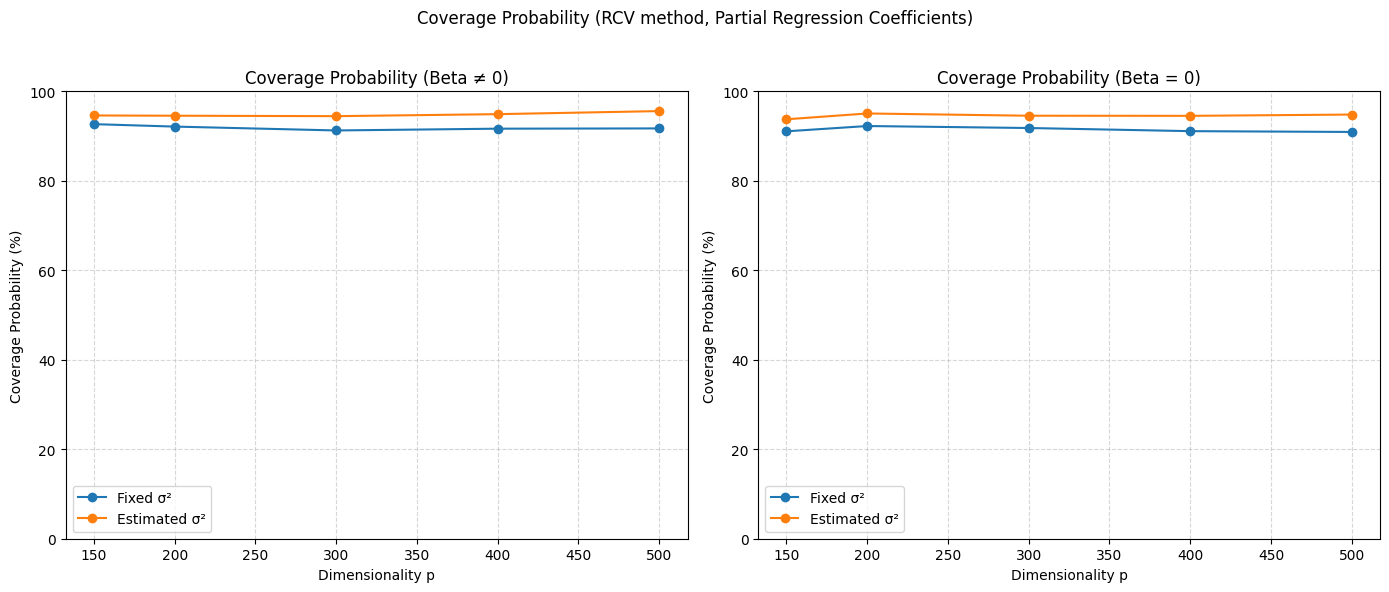

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# 参数设定
B = 25000
n = 100
p_list = [150, 200, 300, 400, 500]
s = 6
sigma2_true = 1
lambda_fixed = 0.3
a = 10
z_alpha = 1.96

# true beta设置
true_beta = np.array([1, -1, 0.5, -0.5, 0.2, -0.2] + [0]*494)

# RCV sigma²估计函数
def estimate_sigma2_rcv(X, y, lam):
    n, p = X.shape
    half = n // 2
    X1, X2 = X[:half], X[half:]
    y1, y2 = y[:half], y[half:]

    model1 = Lasso(alpha=lam, fit_intercept=False, max_iter=50000).fit(X1, y1)
    idx1 = np.where(model1.coef_ != 0)[0]
    model2 = Lasso(alpha=lam, fit_intercept=False, max_iter=50000).fit(X2, y2)
    idx2 = np.where(model2.coef_ != 0)[0]

    if len(idx1) == 0 or len(idx1) >= half or len(idx2) == 0 or len(idx2) >= half:
        return np.nan

    X2_M1, X1_M2 = X2[:, idx1], X1[:, idx2]
    P1 = X2_M1 @ np.linalg.pinv(X2_M1.T @ X2_M1) @ X2_M1.T
    P2 = X1_M2 @ np.linalg.pinv(X1_M2.T @ X1_M2) @ X1_M2.T

    sigma2_1 = y2.T @ (np.eye(half) - P1) @ y2 / (half - len(idx1))
    sigma2_2 = y1.T @ (np.eye(half) - P2) @ y1 / (half - len(idx2))

    numerator = sigma2_1 * (half - len(idx1)) + sigma2_2 * (half - len(idx2))
    denominator = n - len(idx1) - len(idx2)
    sigma2_wrcv = numerator / denominator

    return sigma2_wrcv

results = []

# 主程序 (RCV方法 coverage probability)
for p in p_list:
    beta = true_beta[:p]
    active_idx = np.where(beta != 0)[0]
    null_idx = np.where(beta == 0)[0]

    cov_count_fixed = {"active": 0, "null": 0}
    cov_count_est = {"active": 0, "null": 0}
    total_active = 0
    total_null = 0

    I_p = np.eye(p)
    E_p = np.ones((p, p))
    Gamma = I_p + a * E_p

    for _ in range(B):
        X = np.random.multivariate_normal(np.zeros(p), Gamma, size=n)
        epsilon = np.random.normal(0, np.sqrt(sigma2_true), size=n)
        Y = X @ beta + epsilon

        half = n // 2
        X1, X2 = X[:half], X[half:]
        Y1, Y2 = Y[:half], Y[half:]

        # 模型选择(Lasso)
        lasso = Lasso(alpha=lambda_fixed, fit_intercept=False, max_iter=10000)
        lasso.fit(X1, Y1)
        selected = np.where(lasso.coef_ != 0)[0]

        if len(selected) == 0 or len(selected) >= half:
            continue

        # OLS推断（partial regression系数）
        X_sel = X2[:, selected]
        XtX_inv = np.linalg.inv(X_sel.T @ X_sel)
        beta_hat = XtX_inv @ X_sel.T @ Y2

        # 固定sigma²
        ci_radius_fixed = z_alpha * np.sqrt(sigma2_true * np.diag(XtX_inv))

        # 估计sigma² (RCV方法)
        sigma2_est = estimate_sigma2_rcv(X, Y, lambda_fixed)
        if np.isnan(sigma2_est):
            continue
        ci_radius_est = z_alpha * np.sqrt(sigma2_est * np.diag(XtX_inv))

        # Coverage计算
        for j, idx in enumerate(selected):
            true_val = beta[idx]
            low_fixed, high_fixed = beta_hat[j] - ci_radius_fixed[j], beta_hat[j] + ci_radius_fixed[j]
            low_est, high_est = beta_hat[j] - ci_radius_est[j], beta_hat[j] + ci_radius_est[j]

            if idx in active_idx:
                total_active += 1
                cov_count_fixed["active"] += int(low_fixed <= true_val <= high_fixed)
                cov_count_est["active"] += int(low_est <= true_val <= high_est)
            elif idx in null_idx:
                total_null += 1
                cov_count_fixed["null"] += int(low_fixed <= 0 <= high_fixed)
                cov_count_est["null"] += int(low_est <= 0 <= high_est)

    for group in ["active", "null"]:
        total = total_active if group == "active" else total_null
        if total > 0:
            results.append({
                "p": p,
                "Group": "Beta ≠ 0" if group == "active" else "Beta = 0",
                "Type": "Fixed σ²",
                "Coverage": 100 * cov_count_fixed[group] / total
            })
            results.append({
                "p": p,
                "Group": "Beta ≠ 0" if group == "active" else "Beta = 0",
                "Type": "Estimated σ²",
                "Coverage": 100 * cov_count_est[group] / total
            })

df_cov = pd.DataFrame(results)

# 显示coverage数值
print(df_cov)

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, grp in enumerate(["Beta ≠ 0", "Beta = 0"]):
    subset = df_cov[df_cov["Group"] == grp]
    for t in subset["Type"].unique():
        subsub = subset[subset["Type"] == t]
        axes[idx].plot(subsub["p"], subsub["Coverage"], marker='o', label=t)

    axes[idx].set_title(f"Coverage Probability ({grp})")
    axes[idx].set_xlabel("Dimensionality p")
    axes[idx].set_ylabel("Coverage Probability (%)")
    axes[idx].set_ylim(0, 100)
    axes[idx].grid(True, linestyle='--', alpha=0.5)
    axes[idx].legend()

plt.suptitle("Coverage Probability (RCV method, Partial Regression Coefficients)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


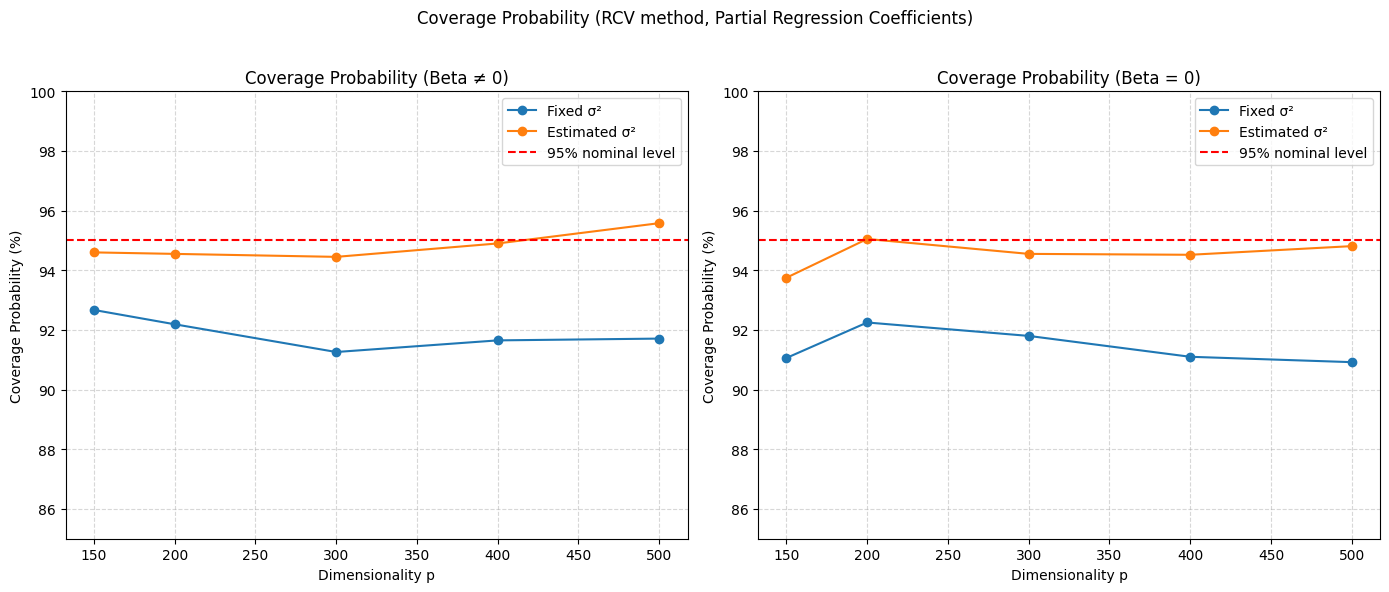

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 根据你给的数据重新创建DataFrame
data = {
    'p': [150, 150, 150, 150, 200, 200, 200, 200, 300, 300, 300, 300, 400, 400, 400, 400, 500, 500, 500, 500],
    'Group': ['Beta ≠ 0', 'Beta ≠ 0', 'Beta = 0', 'Beta = 0'] * 5,
    'Type': ['Fixed σ²', 'Estimated σ²'] * 10,
    'Coverage': [
        92.67, 94.60, 91.06, 93.75,
        92.19, 94.55, 92.25, 95.05,
        91.26, 94.45, 91.80, 94.55,
        91.65, 94.90, 91.10, 94.52,
        91.71, 95.58, 90.92, 94.81
    ]
}

df_cov = pd.DataFrame(data)

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, grp in enumerate(["Beta ≠ 0", "Beta = 0"]):
    subset = df_cov[df_cov["Group"] == grp]
    for t in subset["Type"].unique():
        subsub = subset[subset["Type"] == t]
        axes[idx].plot(subsub["p"], subsub["Coverage"], marker='o', label=t)

    axes[idx].axhline(95, color='red', linestyle='--', label='95% nominal level')
    axes[idx].set_title(f"Coverage Probability ({grp})")
    axes[idx].set_xlabel("Dimensionality p")
    axes[idx].set_ylabel("Coverage Probability (%)")
    axes[idx].set_ylim(85, 100)
    axes[idx].grid(True, linestyle='--', alpha=0.5)
    axes[idx].legend()

plt.suptitle("Coverage Probability (RCV method, Partial Regression Coefficients)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
